# Гладышев ВВ Курсовая работа

In [323]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## Подготовка данных

In [324]:
data = pd.read_csv("train.csv", sep=",")

In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [326]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [327]:
data.corr()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,1.000000,0.012973,-0.005847,-0.010071,0.018449,0.019880,0.001348,-0.008376,0.005004,0.018097,-0.000772,-0.002033,-0.009358,-0.003879,0.001502,-0.008718,0.009880
DistrictId,0.012973,1.000000,0.071432,-0.026613,-0.019910,0.040358,-0.120373,-0.149051,0.013430,0.065294,0.246463,0.167479,0.136095,0.304335,0.306147,0.174214,0.265100
Rooms,-0.005847,0.071432,1.000000,0.662893,0.131336,0.005123,-0.000665,-0.029302,-0.010612,-0.032347,0.075980,0.071335,0.012811,0.042857,0.063557,0.053618,0.550291
Square,-0.010071,-0.026613,0.662893,1.000000,0.196129,0.008320,0.114791,0.081505,-0.009032,-0.064479,-0.070690,-0.043120,0.035241,-0.039748,-0.022960,0.021357,0.520075
LifeSquare,0.018449,-0.019910,0.131336,0.196129,1.000000,-0.001195,0.024559,0.027442,-0.002210,-0.023629,-0.048363,-0.039283,0.012763,-0.026867,-0.024762,-0.007569,0.081292
KitchenSquare,0.019880,0.040358,0.005123,0.008320,-0.001195,1.000000,-0.011397,0.000780,0.000958,-0.005622,0.043379,0.037805,-0.015140,0.009472,0.043170,0.010216,0.028864
Floor,0.001348,-0.120373,-0.000665,0.114791,0.024559,-0.011397,1.000000,0.418986,0.000928,-0.016133,-0.044914,-0.016560,-0.002237,-0.138294,-0.065537,0.024264,0.128715
HouseFloor,-0.008376,-0.149051,-0.029302,0.081505,0.027442,0.000780,0.418986,1.000000,-0.000864,-0.004362,-0.020801,0.007194,-0.008137,-0.143973,-0.068728,0.026279,0.088280
HouseYear,0.005004,0.013430,-0.010612,-0.009032,-0.002210,0.000958,0.000928,-0.000864,1.000000,0.001465,0.003026,0.001970,0.000819,-0.011969,0.011245,0.003681,0.004305
Ecology_1,0.018097,0.065294,-0.032347,-0.064479,-0.023629,-0.005622,-0.016133,-0.004362,0.001465,1.000000,0.026464,0.009264,-0.124068,-0.043547,0.030873,-0.076749,-0.058381


In [328]:
data = data.drop('Healthcare_1', axis=1)

In [329]:
data.loc[(~data['HouseYear'].between(1915, 2020)), 'HouseYear'].sort_values()

9317        1910
2656        1912
5111        1912
910         1914
4189        4968
1497    20052011
Name: HouseYear, dtype: int64

In [330]:
data.loc[4189, 'HouseYear'] = 1968
data.loc[1497, 'HouseYear'] = 2011

In [331]:
data.loc[data['Rooms']>5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


In [332]:
data.loc[377, 'Rooms'] = 3
data.loc[1454, 'Rooms'] = 2
data.loc[2170, 'Rooms'] = 3
data.loc[8849, 'Rooms'] = 3

In [333]:
data.loc[data['Rooms']==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,0,1,B,219281.918007


In [334]:
data.drop(data.loc[data['Rooms']==0].index, axis=0, inplace=True)

In [335]:
data.loc[data['Rooms']==5, 'Square']

1422     95.617533
1503    108.057398
1982    275.645284
3268    121.577423
3271     42.003293
4431     39.906082
4487    183.382273
4762    114.313752
5361    118.871952
5466    112.135525
6623    111.045799
6988    124.933289
8511    198.930182
8659    119.008007
8726     90.762276
8925     85.313605
9432    147.709302
9699    117.855969
Name: Square, dtype: float64

In [336]:
data.drop([3271, 4431], axis=0, inplace=True)

In [337]:
data.loc[6977]

Id                     11602
DistrictId                30
Rooms                      2
Square               641.065
LifeSquare           638.163
KitchenSquare             10
Floor                     20
HouseFloor                19
HouseYear               2019
Ecology_1        7.81528e-05
Ecology_2                  B
Ecology_3                  B
Social_1                  22
Social_2                6398
Social_3                 141
Helthcare_2                3
Shops_1                   23
Shops_2                    B
Price                 133530
Name: 6977, dtype: object

In [338]:
data.loc[6977, 'Square'] = 64.1065
data.loc[6977, 'LifeSquare'] = 63.8163
data.loc[4262, 'Square'] = 60.4706
data.loc[4262, 'LifeSquare'] = 60.3706
data.loc[4690, 'Square'] = 40.9425
data.loc[4690, 'LifeSquare'] = 41.064
data.loc[4328, 'LifeSquare'] = 74.8059
data.loc[1064, 'KitchenSquare'] = data.loc[1064, 'Square'] - data.loc[1064, 'LifeSquare']
data.loc[8584, 'KitchenSquare'] = data.loc[8584, 'Square'] - data.loc[8584, 'LifeSquare']

In [339]:
data.loc[data['Square']<15]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261
8283,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,1,11,B,458378.777006


In [340]:
data = data.drop(data.loc[data['Square']<15].index, axis=0)

In [341]:
data['LifeSquare'] = data['LifeSquare'].fillna(data['LifeSquare'].mean())

In [342]:
data.loc[data['LifeSquare']>250]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,0,2,B,141780.231857
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,1,7,B,394253.299978


In [343]:
data = data.drop(data.loc[data['LifeSquare']>250].index, axis=0)

## Анализ данных

In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9976 entries, 0 to 9999
Data columns (total 19 columns):
Id               9976 non-null int64
DistrictId       9976 non-null int64
Rooms            9976 non-null float64
Square           9976 non-null float64
LifeSquare       9976 non-null float64
KitchenSquare    9976 non-null float64
Floor            9976 non-null int64
HouseFloor       9976 non-null float64
HouseYear        9976 non-null int64
Ecology_1        9976 non-null float64
Ecology_2        9976 non-null object
Ecology_3        9976 non-null object
Social_1         9976 non-null int64
Social_2         9976 non-null int64
Social_3         9976 non-null int64
Helthcare_2      9976 non-null int64
Shops_1          9976 non-null int64
Shops_2          9976 non-null object
Price            9976 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.5+ MB


In [345]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000
mean,8382.660485,50.439354,1.888232,56.209991,36.068382,5.886192,8.526063,12.621191,1984.862771,0.118842,24.704491,5355.826584,8.054230,1.320469,4.234463,214090.505009
std,4859.514979,43.614145,0.810358,18.991067,15.681589,5.175161,5.234886,6.768062,18.415764,0.119084,17.532140,4007.068949,23.857967,1.493527,4.808666,92777.647406
min,0.000000,0.000000,1.000000,16.117154,0.370619,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4167.750000,20.000000,1.000000,41.784790,25.566020,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153907.528147
50%,8394.500000,36.000000,2.000000,52.539909,36.133813,6.000000,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192255.017896
75%,12591.250000,75.000000,2.000000,65.890819,41.423128,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249100.769116
max,16798.000000,209.000000,5.000000,275.645284,233.949309,123.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [346]:
data.corr()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
Id,1.000000,0.013213,-0.008024,-0.005565,-0.004980,0.010290,0.001576,-0.008350,0.003686,0.018562,-0.000714,-0.002119,-0.009383,0.001752,-0.008934,0.009683
DistrictId,0.013213,1.000000,0.075660,-0.028572,-0.059035,0.184907,-0.121390,-0.150542,-0.201061,0.065337,0.245528,0.166556,0.135859,0.305655,0.173475,0.265655
Rooms,-0.008024,0.075660,1.000000,0.767457,0.542824,0.110451,-0.004950,-0.033932,-0.043578,-0.030462,0.077256,0.072169,0.014122,0.064056,0.054089,0.575287
Square,-0.005565,-0.028572,0.767457,1.000000,0.668397,0.114922,0.120665,0.087550,0.190177,-0.072218,-0.078978,-0.048871,0.022785,-0.031505,0.011696,0.584764
LifeSquare,-0.004980,-0.059035,0.542824,0.668397,1.000000,0.039657,0.090829,0.080089,0.176410,-0.058613,-0.128140,-0.100598,0.041198,-0.063360,-0.000135,0.366572
KitchenSquare,0.010290,0.184907,0.110451,0.114922,0.039657,1.000000,-0.011055,0.134475,0.167991,0.020182,0.277514,0.254444,-0.059976,0.153376,0.075794,0.249143
Floor,0.001576,-0.121390,-0.004950,0.120665,0.090829,-0.011055,1.000000,0.420846,0.285612,-0.015608,-0.046442,-0.017883,-0.002205,-0.065648,0.023140,0.127360
HouseFloor,-0.008350,-0.150542,-0.033932,0.087550,0.080089,0.134475,0.420846,1.000000,0.393591,-0.004651,-0.021949,0.006318,-0.008566,-0.069423,0.025582,0.089404
HouseYear,0.003686,-0.201061,-0.043578,0.190177,0.176410,0.167991,0.285612,0.393591,1.000000,-0.066902,-0.047823,0.013838,-0.049248,-0.115752,-0.001516,0.036855
Ecology_1,0.018562,0.065337,-0.030462,-0.072218,-0.058613,0.020182,-0.015608,-0.004651,-0.066902,1.000000,0.026634,0.009436,-0.124243,0.030364,-0.076832,-0.058187


In [347]:
data.Ecology_2.unique()

array(['B', 'A'], dtype=object)

In [348]:
data.Ecology_3.unique()

array(['B', 'A'], dtype=object)

In [349]:
data.Shops_2.unique()

array(['B', 'A'], dtype=object)

In [350]:
data.DistrictId.nunique()

205

In [351]:
data.groupby(['Ecology_2', 'Ecology_3', 'Shops_2'])['Price'].mean().sort_values()

Ecology_2  Ecology_3  Shops_2
A          B          A          159386.651546
B          B          A          192908.557092
A          B          B          198833.005156
B          B          B          215365.530129
           A          B          243179.560704
Name: Price, dtype: float64

In [352]:
data.groupby(['DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2'])['Price'].mean().sort_values()

DistrictId  Ecology_2  Ecology_3  Shops_2
23          B          B          B          126787.814437
158         B          B          B          129080.871245
23          B          B          A          134143.042318
209         B          B          B          140048.802277
27          B          B          B          146185.696061
85          B          B          A          153181.372880
57          A          B          A          158067.834043
3           B          A          B          159292.272505
58          B          B          B          162024.129640
71          A          B          A          162683.695305
6           B          B          B          166091.372843
102         B          B          B          166626.871465
30          B          B          B          170530.981705
62          B          B          A          171168.223258
93          B          B          B          171399.422402
52          B          B          B          171615.244096
126         B 

In [353]:
map_AB = {
    'A': 0,
    'B': 1
}
data["Ecology_2"] = data["Ecology_2"].map(map_AB)
data["Ecology_3"] = data["Ecology_3"].map(map_AB)
data["Shops_2"] = data["Shops_2"].map(map_AB)

In [354]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9976 entries, 0 to 9999
Data columns (total 19 columns):
Id               9976 non-null int64
DistrictId       9976 non-null int64
Rooms            9976 non-null float64
Square           9976 non-null float64
LifeSquare       9976 non-null float64
KitchenSquare    9976 non-null float64
Floor            9976 non-null int64
HouseFloor       9976 non-null float64
HouseYear        9976 non-null int64
Ecology_1        9976 non-null float64
Ecology_2        9976 non-null int64
Ecology_3        9976 non-null int64
Social_1         9976 non-null int64
Social_2         9976 non-null int64
Social_3         9976 non-null int64
Helthcare_2      9976 non-null int64
Shops_1          9976 non-null int64
Shops_2          9976 non-null int64
Price            9976 non-null float64
dtypes: float64(7), int64(12)
memory usage: 1.5 MB


In [392]:
rcParams["figure.figsize"] = 9, 9
#plt.scatter(data['Square'], data['Price'])
#plt.show()

In [393]:
#fig, ax = plt.subplots(figsize=(6, 3))

_ = stats.probplot(
    data['Square'],       # data
    sparams=(16.117154, 275.645284),  # guesses at the distribution parameters
    dist=stats.beta,   # the "dist" object
    plot=ax            # where the data should be plotted
)

In [357]:
data.loc[data['Square']>200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,1,0,31,7010,5,3,7,1,455264.882666
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,1,1,53,14892,4,1,4,1,528560.506016


In [358]:
data = data.drop(data.loc[data['Square']>200].index, axis=0)

In [394]:
#fig, ax = plt.subplots(figsize=(6, 3))

_ = stats.probplot(
    data['Price'],       # data
    sparams=(59174.778028, 633233.466570),  # guesses at the distribution parameters
    dist=stats.beta,   # the "dist" object
    plot=ax            # where the data should be plotted
)

In [360]:
data.to_csv("train_cor.csv", sep=",", index=False)

## Обработка тестовых данных

In [361]:
data_test = pd.read_csv("test.csv", sep=",")

In [362]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [363]:
data_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [364]:
data_test = data_test.drop('Healthcare_1', axis=1)

In [365]:
data_test.loc[(~data_test['HouseYear'].between(1915, 2020)), 'HouseYear'].sort_values()

3253    1908
2       1909
2691    1910
64      1911
1475    1912
2856    1914
Name: HouseYear, dtype: int64

In [366]:
data_test.loc[data_test['Rooms']>5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2071,10793,23,6.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,B,B,2,475,0,0,0,B
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,1,4,B
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,2,4,B


In [367]:
data_test.drop(data_test.loc[data_test['Rooms']>5].index, axis=0, inplace=True)

In [368]:
data_test.loc[data_test['Rooms']==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,0,0,B


In [369]:
data_test.drop(data_test.loc[data_test['Rooms']==0].index, axis=0, inplace=True)

In [370]:
data_test.loc[data_test['Square']<15]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,5,5,B
66,9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,1,3,B
608,16401,30,1.0,2.645046,4.338755,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,3,23,B
837,2138,27,1.0,5.647458,1.501582,1.0,1,1.0,1977,0.017647,B,B,2,469,0,0,0,B
1165,10120,6,1.0,5.100672,3.861780,1.0,3,1.0,1977,0.243205,B,B,5,1564,0,0,0,B
3697,15435,21,1.0,13.305531,9.495367,0.0,6,5.0,1965,0.194489,B,B,47,8004,3,3,5,B
4490,1165,27,1.0,2.372101,1.899119,1.0,2,17.0,1977,0.011654,B,B,4,915,0,0,0,B
4540,7855,6,1.0,4.967143,2.968086,1.0,3,1.0,2018,0.243205,B,B,5,1564,0,0,0,B
4713,170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,B,B,5,1564,0,0,0,B
4902,1420,45,1.0,1.975769,2.900371,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,3,2,B


In [371]:
data_test.drop(data_test.loc[data_test['Square']<15].index, axis=0, inplace=True)

In [372]:
data_test.loc[data_test['Square']>200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
3909,1397,76,3.0,221.138768,118.055342,4.0,32,48.0,2011,0.0,B,B,7,1660,39,1,5,B


In [373]:
data_test.drop(data_test.loc[data_test['Square']>200].index, axis=0, inplace=True)

In [374]:
data_test['LifeSquare'] = data_test['LifeSquare'].fillna(data_test['LifeSquare'].mean())

In [375]:
data_test.loc[data_test['LifeSquare']>200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
410,11533,94,2.0,48.713443,303.071094,6.0,5,12.0,1974,0.521867,B,B,25,6149,0,0,0,B


In [376]:
data_test.drop(data_test.loc[data_test['LifeSquare']>200].index, axis=0, inplace=True)

In [377]:
map_AB = {
    'A': 0,
    'B': 1
}
data_test["Ecology_2"] = data_test["Ecology_2"].map(map_AB)
data_test["Ecology_3"] = data_test["Ecology_3"].map(map_AB)
data_test["Shops_2"] = data_test["Shops_2"].map(map_AB)

In [378]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4983 entries, 0 to 4999
Data columns (total 18 columns):
Id               4983 non-null int64
DistrictId       4983 non-null int64
Rooms            4983 non-null float64
Square           4983 non-null float64
LifeSquare       4983 non-null float64
KitchenSquare    4983 non-null float64
Floor            4983 non-null int64
HouseFloor       4983 non-null float64
HouseYear        4983 non-null int64
Ecology_1        4983 non-null float64
Ecology_2        4983 non-null int64
Ecology_3        4983 non-null int64
Social_1         4983 non-null int64
Social_2         4983 non-null int64
Social_3         4983 non-null int64
Helthcare_2      4983 non-null int64
Shops_1          4983 non-null int64
Shops_2          4983 non-null int64
dtypes: float64(6), int64(12)
memory usage: 739.7 KB


In [379]:
data_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000
mean,8418.722456,51.288180,1.907485,56.460670,36.111697,5.983945,8.638973,12.617098,1984.394341,0.119816,0.990367,0.970098,24.956251,5410.294602,8.232992,1.320088,4.246037,0.917319
std,4830.585600,44.173034,0.806232,18.656069,15.254838,9.962079,5.470359,6.760653,18.543612,0.119925,0.097683,0.170333,17.533866,4026.986239,23.797261,1.479857,4.774908,0.275427
min,1.000000,0.000000,1.000000,16.319015,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,4237.000000,21.000000,1.000000,41.927199,26.068377,1.000000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,0.000000,1.000000,1.000000
50%,8324.000000,37.000000,2.000000,52.934834,36.165260,6.000000,7.000000,12.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,1.000000,3.000000,1.000000
75%,12605.500000,77.000000,2.000000,66.277241,41.757250,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,2.000000,6.000000,1.000000
max,16795.000000,212.000000,5.000000,189.679576,169.901701,620.000000,78.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,6.000000,23.000000,1.000000


In [380]:
data_test.to_csv("test_cor.csv", sep=",", index=False)

## Применение линейной регрессии

In [381]:
from sklearn.linear_model import LinearRegression

X = data[['Rooms', 'Square']]
y = data[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [382]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.3664730368863206

In [383]:
X = data.drop(['Id', 'Price', 'Ecology_2', 'Ecology_3', 'Shops_2'], axis = 1)
y = data[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [384]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.5220830571973796

In [385]:
X = data.drop(['LifeSquare', 'Id', 'Price', 'Ecology_2', 'Ecology_3', 'Shops_2'], axis = 1)
y = data[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [386]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.522095849598033

In [387]:
X = data.drop(['Id', 'Price'], axis = 1)
y = data[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [388]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.5289383739781266

In [389]:
X = data.drop(['Id', 'Price', 'LifeSquare'], axis = 1)
y = data[['Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [390]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.5289617584282936

## Применение RandomForestRegressor

In [397]:
X = data.drop(['Price'], axis = 1)
y = data[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)
model.fit(X_train, y_train.values[:, 0])
y_pred = model.predict(X_test)
full_set_err = r2_score(y_test, y_pred)
full_set_err

0.7169627789754383

### Анализ влияния набора фичей на коэффициент детерминации

In [398]:
def feature_test(X, y, best_r2):
    max_r2 = 0
    max_r2_ind = 0
    new_best_r2 = best_r2
    for ind in range(0, X.shape[1]):
        X_drop = X.drop(X.keys()[ind], axis=1)
        X_train, X_test, y_train, y_test = train_test_split(X_drop, y, test_size=0.3, random_state=42)
        model = RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)
        model.fit(X_train, y_train.values[:, 0])
        y_pred = model.predict(X_test)
        temp_r2 = r2_score(y_test, y_pred)
        feature_score = temp_r2 - best_r2
        if feature_score > max_r2:
            new_best_r2 = temp_r2
            max_r2 = feature_score
            max_r2_ind = ind
        print("{} {}: {} r2: {}".format((ind + 1), X.keys()[ind], feature_score, temp_r2))
    if max_r2:
        print("drop: {}  r2: {}".format(X.keys()[max_r2_ind], max_r2))
        X.drop(X.keys()[max_r2_ind], axis=1, inplace=True)
        feature_test(X, y, new_best_r2)
    else:
        return new_best_r2


In [399]:
new_r2 = feature_test(X, y, full_set_err)
print(new_r2)

1 Id: 0.002969069164596938 r2: 0.7199318481400352
2 DistrictId: -0.0017708595045052844 r2: 0.715191919470933
3 Rooms: 0.0020746354681115964 r2: 0.7190374144435498
4 Square: -0.029683194017060432 r2: 0.6872795849583778
5 LifeSquare: 0.002877629216465505 r2: 0.7198404081919038
6 KitchenSquare: -0.006295786936898473 r2: 0.7106669920385398
7 Floor: -0.001539919548622537 r2: 0.7154228594268157
8 HouseFloor: -0.001568854094727512 r2: 0.7153939248807107
9 HouseYear: -0.0029796148600593764 r2: 0.7139831641153789
10 Ecology_1: -0.009212696475848436 r2: 0.7077500824995898
11 Ecology_2: -0.0009774120811738563 r2: 0.7159853668942644
12 Ecology_3: -0.0006604524147706403 r2: 0.7163023265606676
13 Social_1: -0.001128728267629553 r2: 0.7158340507078087
14 Social_2: -0.0008345107645998384 r2: 0.7161282682108384
15 Social_3: -0.013976045601941767 r2: 0.7029867333734965
16 Helthcare_2: -7.281060717390098e-05 r2: 0.7168899683682644
17 Shops_1: -0.0006738754350956722 r2: 0.7162889035403426
18 Shops_2: -0.0

#### Получен оптимизированный набор фичей

In [402]:
#X = X.drop(['Id', 'LifeSquare', 'Rooms', 'Ecology_3'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X.keys()

Index(['DistrictId', 'Square', 'KitchenSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Ecology_2', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2'],
      dtype='object')

In [403]:
model = RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)
model.fit(X_train, y_train.values[:, 0])
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.7239871432435436

### Поиск оптимального значения параметра n_estimators

In [405]:
for ind in range(0, 6):
    model = RandomForestRegressor(max_depth=12, n_estimators = ind * 100 + 500, random_state=42)
    model.fit(X_train, y_train.values[:, 0])
    y_pred = model.predict(X_test)
    print("n_estimators: {} r2: {}".format(ind * 100 + 500, r2_score(y_test, y_pred)))

n_estimators: 500 r2: 0.7239572693924414
n_estimators: 600 r2: 0.7241202895322075
n_estimators: 700 r2: 0.7242796351876991
n_estimators: 800 r2: 0.7241787559636361
n_estimators: 900 r2: 0.7242133738560208
n_estimators: 1000 r2: 0.7239871432435436


### Поиск оптимального значения параметра max_depth

In [406]:
for ind in range(11, 18):
    model = RandomForestRegressor(max_depth = ind, n_estimators = 700, random_state=42)
    model.fit(X_train, y_train.values[:, 0])
    y_pred = model.predict(X_test)
    print("max_depth: {} r2: {}".format(ind, r2_score(y_test, y_pred)))

max_depth: 11 r2: 0.7224288192475633
max_depth: 12 r2: 0.7242796351876991
max_depth: 13 r2: 0.7248171624456934
max_depth: 14 r2: 0.7247731657728596
max_depth: 15 r2: 0.7247497160388567
max_depth: 16 r2: 0.7244493565363179
max_depth: 17 r2: 0.7244257819907332


#### Определение коэффициента детерминации с оптимизированными параметрами RandomForestRegressor

In [408]:
model = RandomForestRegressor(max_depth=13, n_estimators=700, random_state=42)
model.fit(X_train, y_train.values[:, 0])
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.7248171624456934

## Применение TSNE и KMeans

In [440]:
from sklearn.preprocessing import StandardScaler

X = data.drop(['Id', 'Price'], axis = 1)
#X = data.drop(['Id', 'LifeSquare', 'Rooms', 'Ecology_3'], axis=1)
#X = data[['DistrictId', 'Rooms', 'Square', 'Social_1', 'Helthcare_2', 'LifeSquare', 'KitchenSquare', 'Social_2']]
y = data[['Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


In [441]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(6981, 17)
После:	(6981, 2)


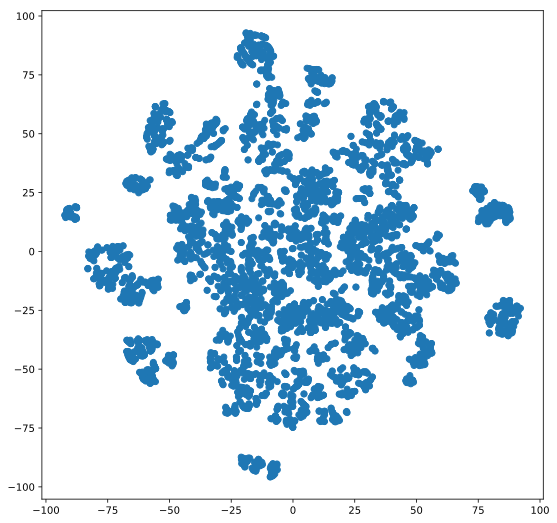

In [442]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

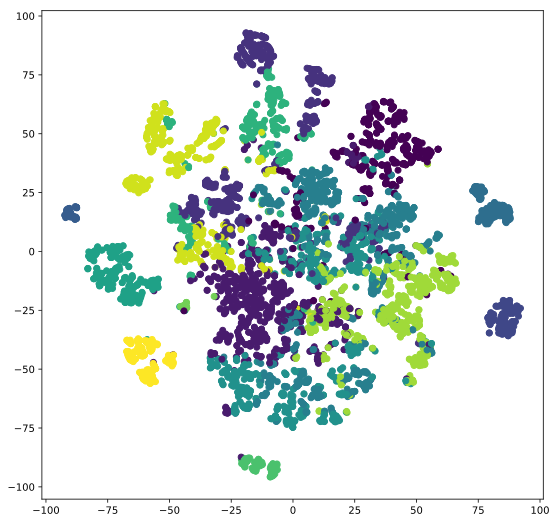

In [446]:
kmeans = KMeans(n_clusters=15)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [447]:
labels_test = kmeans.predict(X_test_scaled)

In [448]:
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)

y_test_pred = lr.predict(X_test_scaled)

r2_score(y_test, y_test_pred)

0.5289383739781242

In [497]:
y_test_all = pd.DataFrame()
y_test_pred_all = np.empty(shape=[1, 1])

In [498]:
y_test_all.shape

(0, 0)

In [502]:
lr.fit(X_train_scaled.loc[labels_train == 0], y_train[labels_train == 0])
y_test_pred = lr.predict(X_test_scaled.loc[labels_test == 0])
print(r2_score(y_test[labels_test == 0], y_test_pred))
y_test_all = y_test[labels_test == ind].copy
y_test_pred_all = y_test_pred.copy
for ind in range(1, 15):
    lr.fit(X_train_scaled.loc[labels_train == ind], y_train[labels_train == ind])
    y_test_pred = lr.predict(X_test_scaled.loc[labels_test == ind])
    print(r2_score(y_test[labels_test == ind], y_test_pred))
    #y_test_all = np.hstack([y_test_all, y_test[labels_test == ind]])
    #y_test_pred_all = np.hstack([y_test_pred_all, y_test_pred])
#print("summ r2: {}".format(r2_score(y_test_all, y_test_pred_all)))

0.504576930292
0.10153065462538546
0.41468541405077386
0.08286129492207861
0.6834711518566868
0.5708446899557618
0.32283692543770903
0.43727715325353134
0.6546857776073373
0.45812596161593755
0.7097813562052143
0.8146662105062941
0.6378255493253393
0.3056185417721836
0.6171360647845987


In [503]:
y_test_all

<bound method NDFrame.copy of               Price
5187  214619.136337
3322  579727.747854
5902  570559.403135
3924  425080.945326
2530  429171.389395
2656  284884.959104
4047  228572.520347
3159  311756.185827
305   576037.632382
3284  310638.324109
9052  287707.984739
9411  375292.652847
4491  427613.410364
1582  386269.729408
3672  481666.467504
6515  477900.371154
2134  573539.701956
4546  207656.908336
519   372016.922629
1147  341698.932707
5145  325730.730440
1566  354909.843690
1742  360202.411651
7231  387511.738610
1092  297190.797555
2550  227554.016931
8746  361430.285600
2043  248558.178450
3468  367368.954516
3691  236130.689747
...             ...
9762  313028.720856
8390  348962.861294
2976  386301.977094
7239  377460.300501
1661  231537.831171
1537  625820.041178
4188  391982.648184
5338  506353.577684
4480  428238.088032
8473  396365.673797
5303  293394.774010
9104  320278.148413
196   309690.981584
9484  426958.079415
3133  512797.373401
3476  344367.501596
2551  3016

In [460]:
model = RandomForestRegressor(max_depth=16, n_estimators=1000, random_state=42)
model.fit(X_train_scaled, y_train.values[:, 0])
y_pred = model.predict(X_test_scaled)
r2_score(y_test, y_pred)

0.7213956006880988

In [462]:
model = RandomForestRegressor(max_depth=16, n_estimators=1000, random_state=42)
for ind in range(0, 15):
    model.fit(X_train_scaled.loc[labels_train == ind], y_train[labels_train == ind])
    y_test_pred = model.predict(X_test_scaled.loc[labels_test == ind])
    print(r2_score(y_test[labels_test == ind], y_test_pred))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5411336734348633


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.364699284721131


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6454834493290198


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.41901872210682056


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.522989169164443


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5915299494056623


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5202507967028327


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.4061402084453526


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6687027389290875


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.74594234440774


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7085833227262807


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.35413817361447786


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6456500136469665


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6696399349427162


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5465882459734563
